In [305]:
import pandas as pd
from matplotlib import pyplot as plt

In [306]:
df = pd.read_csv("results_2.csv")
one_to_one_df = pd.read_csv("results_1_to_1_different_scoring.csv")
df.columns

Index(['Unnamed: 0', 'rmse', 'oos_rmse', 'FGI', 'in_study_prediction',
       'in_study_labels', 'oos_prediction', 'oos_labels',
       'dimensionality_reduction', 'out_of_study', 'in_study',
       'feature_combinations'],
      dtype='object')

In [307]:
feature_group_regexes = {
    "eye_tracking": [
        "information_processing_ratio",
        "saccade_speed_skewness",
        "entropy_xy",
        "saccade_verticality",
    ],
    "heatmaps":[
        "heatmaps_*",
    ],
    "fft":[
        "pupil_diameter_rolling__fft_aggregated_*",
        "^duration_rolling__fft_aggregated__*",
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_duration_rolling__fft_aggregated__*",
    ],
    "lhipa": [
        "pupil_diameter_rolling__lhipa",
        "saccade_length_rolling__lhipa",
        "saccade_duration_rolling__lhipa",
        "^duration_rolling__lhipa",
    ],
    "markov":[
        "^duration_rolling__markov",
        "pupil_diameter_rolling__markov",
        "saccade_duration_rolling__markov",
        "saccade_length_rolling__markov",
    ],
    "Arma": [
        "pupil_diameter_rolling__arma__*",
        "^duration_rolling__arma__*",
        "saccade_length_rolling__arma__*",
        "saccade_duration_rolling__arma__*",
    ],
    "garch":[
        "saccade_duration_rolling__garch",
        "^duration_rolling__garch",
        "pupil_diameter_rolling__garch",
        "saccade_length_rolling__garch",
    ],
    "pupil_diameter":[
        "pupil_diameter_rolling__fft_aggregated_*",
        "pupil_diameter_rolling__lhipa",
        "pupil_diameter_rolling__markov",
        "pupil_diameter_rolling__arma__*",
        "pupil_diameter_rolling__garch",
    ],
    "fixation_duration":[
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__lhipa",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
    ],
    "saccade_length":[
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__lhipa",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
    ],
    "saccade_duration":[
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__lhipa",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
    "all":[
        "information_processing_ratio",
        "saccade_speed_skewness",
        "entropy_xy",
        "saccade_verticality",
        "heatmaps_*",
        "pupil_diameter_rolling__fft_aggregated_*",
        "pupil_diameter_rolling__lhipa",
        "pupil_diameter_rolling__markov",
        "pupil_diameter_rolling__arma__*",
        "pupil_diameter_rolling__garch",
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__lhipa",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__lhipa",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__lhipa",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
}

baselines = {
 "cscw": 0.2054194369131811,
 "emip": 0.31011607853729956,
 "fractions": 0.22897823445668405,
 "emip_fractions": 0.2943192380673428,
 "fractions_cscw": 0.23408157826890597,
 "emip_cscw": 0.28871689591649174
}
random_baselines = {
 'cscw': 0.35408194888273653,
 'emip': 0.4241358322246148,
 'fractions': 0.39295164906188074,
 'emip_fractions': 0.4170846635199361,
 'fractions_cscw': 0.37619048780763514,
 'emip_cscw': 0.40841293420269603
}


name_mapping = {
 "['cscw']": "cscw",
 "['emip']": "emip",
 "['fractions']": "fractions",
 "['emip', 'fractions']": "emip_fractions",
 "['fractions', 'cscw']": "fractions_cscw",
 "['emip', 'cscw']": "emip_cscw"
}

inv_map = {str(v): k for k, v in feature_group_regexes.items()}
df["feature_combinations"] = df["feature_combinations"].map(inv_map)
df["in_study"] = df["in_study"].map(name_mapping)
df["baseline"] = df.loc[:, "in_study"].map(baselines)
df["oos_baseline"] = df.loc[:, "out_of_study"].map(baselines)
df["random_baseline"] = df.loc[:, "in_study"].map(random_baselines)
df["oos_random_baseline"] = 0.281476819416418 #df.loc[:, "out_of_study"].map(random_baselines)

one_to_one_df["feature_combinations"] = one_to_one_df["feature_combinations"].map(inv_map)
one_to_one_df["in_study"] = one_to_one_df["in_study"].map(name_mapping)
one_to_one_df["baseline"] = one_to_one_df.loc[:, "in_study"].map(baselines)
one_to_one_df["oos_baseline"] = one_to_one_df.loc[:, "out_of_study"].map(baselines)
one_to_one_df["random_baseline"] = one_to_one_df.loc[:, "in_study"].map(random_baselines)
one_to_one_df["oos_random_baseline"] = 0.281476819416418 #one_to_one_df.loc[:, "out_of_study"].map(random_baselines)
one_to_one_df

,Unnamed: 0,rmse,oos_rmse,FGI,in_study_prediction,in_study_labels,oos_prediction,oos_labels,dimensionality_reduction,out_of_study,in_study,feature_combinations,baseline,oos_baseline,random_baseline,oos_random_baseline
0,0,0.182652,0.285630,0.012656,"[0.27909710790000003, 0.4385120934, 0.45321807...","{'14': 0.5, '23': 0.25, '13': 0.25, '21': 0.12...","[0.3667149255, 0.386564528, 0.4604992121, 0.17...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,fractions,eye_tracking,0.228978,0.205419,0.392952,0.281477
1,1,0.281150,0.299843,0.012541,"[0.1051971136, 0.6860068024, 0.4851417082, 0.3...","{'64': 0.125, '31': 0.125, '54': 0.5, '23': 0....","[0.16189125640000002, 0.5051521785, 0.16151373...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",PCA,cscw,fractions,eye_tracking,0.228978,0.205419,0.392952,0.281477
2,2,0.283040,0.310422,0.012937,"[0.297268378, 0.2783751685, 0.2941941973, 0.34...","{'50': 0.75, '61': 0.0, '51': 0.75, '7': 0.625...","[0.2923517504, 0.33083295500000004, 0.30817077...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,fractions,heatmaps,0.228978,0.205419,0.392952,0.281477
3,3,0.279803,0.281408,0.013083,"[0.3187714874, 0.310072008, 0.3054223287, 0.32...","{'62': 0.125, '82': 0.25, '28': 0.0, '27': 0.0...","[0.34398351650000003, 0.35222613540000003, 0.3...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",PCA,cscw,fractions,heatmaps,0.228978,0.205419,0.392952,0.281477
4,4,0.313391,0.261259,0.012967,"[0.2171979356, 0.2389999636, 0.1608469951, 0.2...","{'35': 0.0, '50': 0.75, '51': 0.75, '82': 0.25...","[0.37516437280000003, 0.3872146416, 0.36629620...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,fractions,fft,0.228978,0.205419,0.392952,0.281477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,0.325007,0.257697,0.010699,"[0.32683474030000004, 0.43827630700000003, 0.3...","{'167': 0.0, '165': 0.5, '188': 0.5, '209': 0....","[0.3616813487, 0.4131561153, 0.461097919100000...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",PCA,cscw,emip,saccade_length,0.310116,0.205419,0.424136,0.281477
140,140,0.292237,0.242550,0.010124,"[0.40189894200000004, 0.3757510041, 0.44738919...","{'57': 0.5, '39': 0.5, '9': 1.0, '65': 0.0, '2...","[0.44069477220000003, 0.3529502752, 0.30829989...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,emip,saccade_duration,0.310116,0.205419,0.424136,0.281477
141,141,0.344605,0.285656,0.010939,"[0.6872931449, 0.4676928312, 0.616102292800000...","{'86': 0.5, '116': 0.5, '210': 0.5, '118': 1.0...","[0.2024612052, 0.4208015416, 0.607462448400000...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",PCA,cscw,emip,saccade_duration,0.310116,0.205419,0.424136,0.281477
142,142,0.281845,0.228695,0.009781,"[0.5048715818, 0.5267874381000001, 0.392238439...","{'8': 0.5, '14': 0.5, '156': 0.0, '215': 0.5, ...","[0.37082091440000003, 0.3750503281, 0.48174823...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,emip,all,0.310116,0.205419,0.424136,0.281477


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Arma'),
  Text(1, 0, 'all'),
  Text(2, 0, 'eye_tracking'),
  Text(3, 0, 'fft'),
  Text(4, 0, 'fixation_duration'),
  Text(5, 0, 'garch'),
  Text(6, 0, 'heatmaps'),
  Text(7, 0, 'lhipa'),
  Text(8, 0, 'markov'),
  Text(9, 0, 'pupil_diameter'),
  Text(10, 0, 'saccade_duration'),
  Text(11, 0, 'saccade_length')])

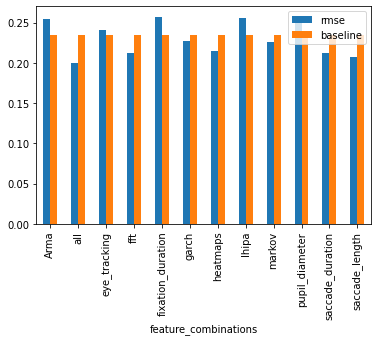

In [312]:
#MINIMUM RMSE PER FEATURE
minimum_rmse = df.loc[df.groupby('feature_combinations')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="feature_combinations", y=["rmse", "baseline"])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Arma'),
  Text(1, 0, 'all'),
  Text(2, 0, 'eye_tracking'),
  Text(3, 0, 'fft'),
  Text(4, 0, 'fixation_duration'),
  Text(5, 0, 'garch'),
  Text(6, 0, 'heatmaps'),
  Text(7, 0, 'lhipa'),
  Text(8, 0, 'markov'),
  Text(9, 0, 'pupil_diameter'),
  Text(10, 0, 'saccade_duration'),
  Text(11, 0, 'saccade_length')])

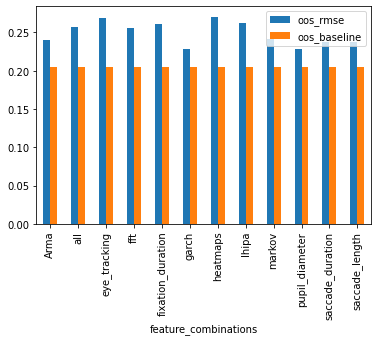

In [313]:
#MINIMUM OOS_RMSE PER FEATURE
minimum_rmse = df.loc[df.groupby('feature_combinations')["oos_rmse"].idxmin()]
minimum_rmse.plot.bar(x="feature_combinations", y=["oos_rmse", "oos_baseline"])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='in_study'>

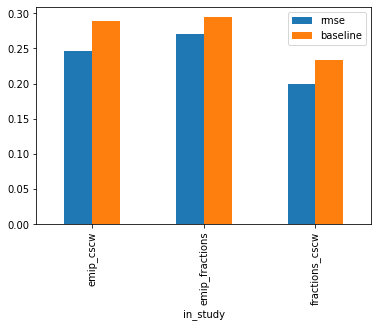

In [310]:
#MINIMUM RMSE PER DATASET
minimum_rmse = df.loc[df.groupby('in_study')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="in_study", y=["rmse", "baseline"])

<AxesSubplot:xlabel='out_of_study'>

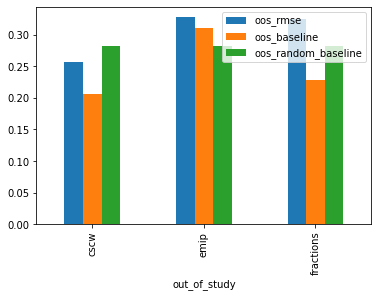

In [297]:
# OOS best pipeline vs baseline
minimum_rmse = df.loc[df.groupby('out_of_study')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="out_of_study", y=["oos_rmse", "oos_baseline", "oos_random_baseline"])

<AxesSubplot:xlabel='in_study'>

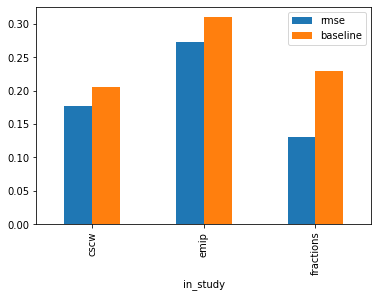

In [279]:
#MINIMUM RMSE PER oos DATASET
minimum_rmse = one_to_one_df.loc[one_to_one_df.groupby('in_study')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="in_study", y=["rmse", "baseline"])

<AxesSubplot:xlabel='out_of_study'>

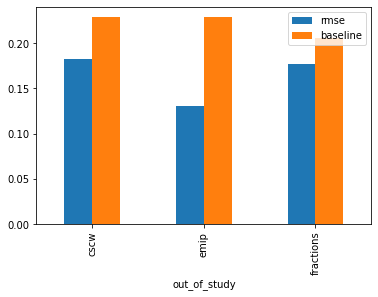

In [265]:
minimum_rmse = one_to_one_df.loc[one_to_one_df.groupby('out_of_study')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="out_of_study", y=["rmse", "baseline"])

/Users/august/Library/Caches/pypoetry/virtualenvs/ideal-pancake-DNon77ew-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


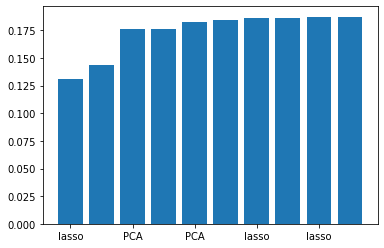

In [93]:
# MEAN RMSE PER oos DATASET
smallest = df.nsmallest(10, "rmse")
fig, ax = plt.subplots()
ax.bar(range(len(smallest.index)), smallest.loc[:, "rmse"])
ax.set_xticklabels(smallest.loc[:, "dimensionality_reduction"])
plt.show()

[Text(0, 0, 'PCA'),
 Text(1, 0, 'lasso'),
 Text(2, 0, 'lasso'),
 Text(3, 0, 'lasso'),
 Text(4, 0, 'lasso'),
 Text(5, 0, 'lasso'),
 Text(6, 0, 'PCA'),
 Text(7, 0, 'lasso'),
 Text(8, 0, 'lasso'),
 Text(9, 0, 'lasso'),
 Text(10, 0, 'PCA'),
 Text(11, 0, 'PCA'),
 Text(12, 0, 'PCA'),
 Text(13, 0, 'PCA'),
 Text(14, 0, 'PCA'),
 Text(15, 0, 'lasso'),
 Text(16, 0, 'lasso'),
 Text(17, 0, 'PCA'),
 Text(18, 0, 'lasso'),
 Text(19, 0, 'lasso')]

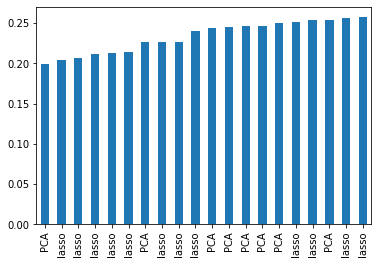

In [267]:
# TOP 13 RMSE with dimensionality reduction
smallest = df.nsmallest(20, "rmse")
ax = smallest.loc[:,"rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["dimensionality_reduction"], rotation=90)

In [268]:
# TOP 13 RMSE with features
smallest = df.loc["out_of_study"].nsmallest(13, "oos_rmse")
ax = smallest.loc[].plot(kind="bar", y use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)

SyntaxError: invalid syntax (<ipython-input-268-bfe63e77d5a5>, line 3)

[Text(0, 0, 'garch'),
 Text(1, 0, 'pupil_diameter'),
 Text(2, 0, 'saccade_length'),
 Text(3, 0, 'saccade_duration'),
 Text(4, 0, 'Arma'),
 Text(5, 0, 'pupil_diameter'),
 Text(6, 0, 'markov'),
 Text(7, 0, 'saccade_duration'),
 Text(8, 0, 'fft'),
 Text(9, 0, 'Arma'),
 Text(10, 0, 'all'),
 Text(11, 0, 'fixation_duration'),
 Text(12, 0, 'lhipa')]

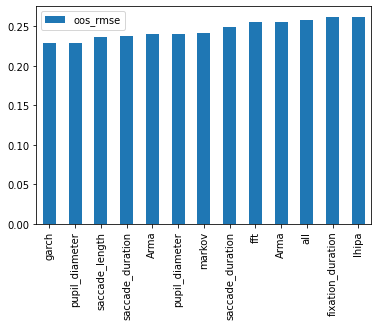

In [275]:
# TOP 13 OOS_RMSE with features
smallest = df.nsmallest(13, "oos_rmse")
ax = smallest.plot(kind="bar", y="oos_rmse", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)

In [131]:
# TOP 13 RMSE with dimensionality reduction
smallest = df.nsmallest(13, "rmse")
smallest_with_other_dim = df[df.loc[:, ["feature_combinations", "in_study"]] == smallest.loc[:, ["feature_combinations", "in_study"] ] ]
ax = smallest.loc[:,"rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["dimensionality_reduction"], rotation=90)

ValueError: Can only compare identically-labeled DataFrame objects

[Text(0, 0, 'pupil_diameter'),
 Text(1, 0, 'all'),
 Text(2, 0, 'heatmaps'),
 Text(3, 0, 'all'),
 Text(4, 0, 'Arma'),
 Text(5, 0, 'saccade_length'),
 Text(6, 0, 'heatmaps'),
 Text(7, 0, 'fft'),
 Text(8, 0, 'eye_tracking'),
 Text(9, 0, 'saccade_duration'),
 Text(10, 0, 'garch'),
 Text(11, 0, 'heatmaps'),
 Text(12, 0, 'fft'),
 Text(13, 0, 'heatmaps'),
 Text(14, 0, 'eye_tracking'),
 Text(15, 0, 'markov'),
 Text(16, 0, 'garch'),
 Text(17, 0, 'garch'),
 Text(18, 0, 'eye_tracking'),
 Text(19, 0, 'eye_tracking'),
 Text(20, 0, 'pupil_diameter'),
 Text(21, 0, 'saccade_length'),
 Text(22, 0, 'pupil_diameter'),
 Text(23, 0, 'markov'),
 Text(24, 0, 'fft'),
 Text(25, 0, 'markov')]

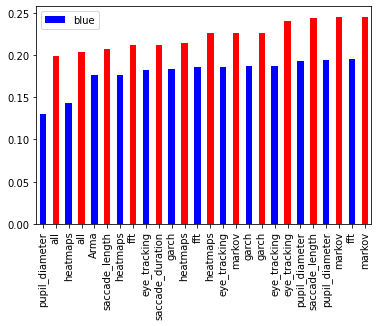

In [284]:
# TOP 13 RMSE with for one to one and 
smallest = df.nsmallest(13, "rmse")
smallest = smallest.reset_index()
smallest.index = 2*smallest.index +1
smallest_oto = one_to_one_df.nsmallest(13, "rmse")
smallest_oto = smallest_oto.reset_index()
smallest_oto.index = 2*smallest_oto.index
smallest = pd.concat([smallest, smallest_oto]).sort_index()


ax = smallest.loc[:,"rmse"].plot(kind="bar", color=['blue','red'], use_index=True)
ax.legend({"blue": "1t1", "red": "2to1"})
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)

In [161]:
df.loc[:, "in_study"].unique()

array(["['fractions', 'cscw']", "['emip', 'fractions']",
       "['emip', 'cscw']"], dtype=object)

In [ ]:
smallest = df.nsmallest(13, "rmse")

ax = smallest.loc[:,"rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["dimensionality_reduction"], rotation=90)